# Report on [reed](https://www.reed.co.uk/) data analysis to identify required skills for particular job positions.

## Introduction
Here, the task included grabing data for job positions Accountant, Retail, Sales & Marketing, Administration, Social Care from [reed](https://www.reed.co.uk/) job descriptions and analyzing these data to identify required skills for these job positions. I collect the data using [reed API](https://www.reed.co.uk/developers/jobseeker) and for the limitation ot reed API in collecting Job description and given riquired skills I had to use web scraping. I have uploaded these data set for the given 5 keywords in [my github](https://github.com/NeomanNasir/Data-Science-Projects/tree/master/reed%20data%20analysis/cleaned%20data). 

In Analysis part, I use the strategy for each job positions is: 
* First to have required skills keyword, I see the frequency of the given required skills keyword and take top 10 from them.
* Then I search these 10 keywords in each job descriptions, and count them.
* Finally those are found higher, I take 5 of them as they are the required skills needed for the particular job position. 


## Summary of the results:
After doing all the analyis I take 5 most important skills for each job positions, these are given below:
* Accountant: **accountant, finance, reporting, acca, aca**
* Retail: **retail, sales, customer service, management, communication skills**
* Sales & Marketing: **sales, customer service, business development, communication skills, retail**
* Administration: **admin, administration, customer service, organizational skills, communication skills**
* Social Care: **social care, support worker, mental health, care assistant, learning disabilities**


## Data Collection and Prepearing
Here I collect around 1000 unique jobIds, url, required skills, and full job descriptions for each job positions and save them in csv file.

In [1]:
from bs4 import BeautifulSoup
import requests
import logging
import sys
import re
import csv
from html import unescape
from urllib.request import urlopen
import pandas as pd
import numpy as np
import time
import random
import json
from IPython.display import clear_output

In [ ]:
# Collceting JobId and url using API
# I use same procedure for each job positions

job_id_url = []
p = 0
for page_no in range(1, 1000):
    p += 1
    #time.sleep(random.uniform(0.5, 1))
    try:
        data_get = requests.get('https://www.reed.co.uk/api/1.0/search?&keywords="Social Care"&resultsToTake=100&resultsToSkip='+str(page_no),  auth=('cb3f6d0c-cb2e-44ad-ae6d-81615d88aea4', ''))
    except:
        print('error occured!')
        break
    print(data_get.status_code, p)
   # clear_output(wait=True)
    
    if data_get.status_code != 200:
        print('crossed the service limit!')
        break
        
    raw_data = data_get.content
    if raw_data is None:
        continue
    raw_data = json.loads(raw_data)['results']

    for i in range(len(raw_data)):
        jobid = raw_data[i]['jobId']
        joburl = raw_data[i]['jobUrl']
        job_id_url.append(tuple([jobid, joburl]))
        

job_data = list(set(job_id_url))
df = pd.DataFrame(job_data, columns = ['jobId', 'jobUrl'])
df.to_csv('Social_Care.csv',index=False)

In [ ]:
# Now will create our 5 dataframe for 5 keywords using collected data
# collecting given required skills, job description for the collected jobIds 
# using web scraping and reed job details API then merge them with previous dataset.
ac = pd.read_csv('accountant.csv')
rt = pd.read_csv('Retail.csv')
sm = pd.read_csv('sales_and_marketing.csv')
ad = pd.read_csv('Administration.csv')
sc = pd.read_csv('Social_Care.csv')
ac_df = pd.DataFrame(ac)
rt_df = pd.DataFrame(rt)
sm_df = pd.DataFrame(sm)
ad_df = pd.DataFrame(ad)
sc_df = pd.DataFrame(sc)

# Let's complete analysis to descision making process for accountant for the first
ac_df['required_skills'] = ''
ac_df['description'] = ''
p = 0
for i in range(len(ac_df['jobUrl'])):
    url = ac_df['jobUrl'][i]
    try:
        p += 1
        scraped_data = requests.get(url)
        print(scraped_data.status_code, p)
    except:
        print('error in requests')
        break
        
    soup = BeautifulSoup(scraped_data.text, 'html.parser')
    
    req_skills = soup.find('ul', class_ = 'list-unstyled skills-list')
    if req_skills is not None:
        req_skills = req_skills.text.split('\n')
        req_skills = list(filter(None, req_skills))
    desc = soup.find('div', class_ = 'description')
    if desc is not None:
        desc = desc.text.replace('\n', '').replace('\r', '').replace('Apply now','').lstrip()
    ac_df['required_skills'][i] = req_skills
    ac_df['description'][i] = desc





In [156]:
ac_df.head(10)

,jobId,jobUrl,required_skills,description
0,39875009,https://www.reed.co.uk/jobs/temporary-to-perma...,"['Capex', 'Financial Statements', 'Management ...","Our Client, an established and growing SME dev..."
1,39911778,https://www.reed.co.uk/jobs/senior-accountant-...,NaN,Apply on employer's website ...
2,39876080,https://www.reed.co.uk/jobs/financial-accounta...,NaN,"Financial Accountant - £55,000 to £60,000 + Be..."
3,39871833,https://www.reed.co.uk/jobs/financial-accounta...,"['Finance Manager', 'Financial Controller', 'F...","Our client, a leading organisation who provide..."
4,39912688,https://www.reed.co.uk/jobs/part-qualified-acc...,"['Bookkeeping', 'Management Accountant', 'Mana...",TBOS have an exciting opportunity for an exper...
5,39935020,https://www.reed.co.uk/jobs/semi-senior-full-s...,"['AAT', 'Accountancy Firm', 'Microsoft Excel',...",Our client is an expanding firm of Chartered A...
6,39907889,https://www.reed.co.uk/jobs/revenue-accountant...,NaN,Acquia is the open source digital experience c...
7,39909836,https://www.reed.co.uk/jobs/supply-chain-accou...,NaN,Investigo have partnered with a well-respected...
8,39928879,https://www.reed.co.uk/jobs/lead-project-accou...,"['Project Accounting Manager', 'Lead Project A...",Assist manager & delivery of the project cost ...
9,39935621,https://www.reed.co.uk/jobs/accountant/39935621,NaN,This an exciting opportunity for an aspiring a...


In [ ]:
# For Socieal_care job position
sc = pd.read_csv('Social_Care.csv')
sc_df = pd.DataFrame(sc)
sc_df['required_skills'] = ''
sc_df['description'] = ''
p = 0
for i in range(len(sc_df['jobUrl'])):
    url = sc_df['jobUrl'][i]
    try:
        p += 1
        scraped_data = requests.get(url)
        print(scraped_data.status_code, p)
    except:
        print('error in requests')
        break
        
    soup = BeautifulSoup(scraped_data.text, 'html.parser')
    
    req_skills = soup.find('ul', class_ = 'list-unstyled skills-list')
    if req_skills is not None:
        req_skills = req_skills.text.split('\n')
        req_skills = list(filter(None, req_skills))
    desc = soup.find('div', class_ = 'description')
    if desc is not None:
        desc = desc.text.replace('\n', '').replace('\r', '').replace('Apply now','').lstrip()
    sc_df['required_skills'][i] = req_skills
    sc_df['description'][i] = desc


sc_df.to_csv('social_care_final.csv',index=False)
sc_df.head(10)

## Data Analysis
Here I use our strategies discussed previous:
* First to have required skills keyword, I see the frequency of the given required skills keyword and take top 10 from them.
* Then I search these 10 keywords in each job descriptions, and count them.
* Finally those are found higher, I take 5 of them as they are the required skills needed for the particular job position.

In [2]:
##Accountant Analysis
ac = pd.read_csv('accountant_final.csv')
ac_df = pd.DataFrame(ac)

In [3]:
ac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   jobId            1097 non-null   int64 
 1   jobUrl           1097 non-null   object
 2   required_skills  315 non-null    object
 3   description      1091 non-null   object
dtypes: int64(1), object(3)
memory usage: 34.4+ KB


In [8]:
ac_rec_skills = ac_df[ac_df['required_skills'].notnull()]['required_skills'].copy()
ac_rec_skills = ac_rec_skills.reset_index()
ac_rec_skills.drop('index', axis = 1, inplace = True)
print(len(ac_rec_skills))
ac_rec_skills


315


,required_skills
0,"['Capex', 'Financial Statements', 'Management ..."
1,"['Finance Manager', 'Financial Controller', 'F..."
2,"['Bookkeeping', 'Management Accountant', 'Mana..."
3,"['AAT', 'Accountancy Firm', 'Microsoft Excel',..."
4,"['Project Accounting Manager', 'Lead Project A..."
...,...
310,"['Accountants', 'Audit', 'External Audit']"
311,"['Financial Services', 'Insurance', 'Managemen..."
312,"['Consolidation', 'Finance', 'Finance Departme..."
313,['Month End/Balance Sheet Reconciliations']


In [5]:
x = ac_rec_skills.loc[0]
x = x.str.replace('[', '').str.replace(']', '').str.replace("'", '')
x.str.split(',')[0][0]

'Capex'

In [104]:
all_ac_rec_skills = []
for i in range(len(ac_rec_skills)):
    x = ac_rec_skills.loc[i].str.replace('[', '').str.replace(']', '').str.replace("'", '')
    li = x.str.split(',')[0]
    for j in range(len(li)):
        all_ac_rec_skills.append(li[j].strip().lower())
        
all_ac_rec_skills = pd.Series(all_ac_rec_skills)
top_skills = list(all_ac_rec_skills.value_counts().head(10).index)
all_ac_rec_skills.value_counts().head(10)

top_skills_count = all_ac_rec_skills.value_counts().head(10)
top_skills_count


acca                     65
management accountant    44
cima                     38
aca                      36
management accounts      35
accounting               28
finance                  26
accountant               23
aat                      21
reporting                17
dtype: int64

In [105]:
ac_desc_df = ac_df[ac_df['description'].notnull()].copy().reset_index()

ac_desc_df.drop('index', axis =1, inplace = True)
for skill in top_skills:
    ac_desc_df[skill] = ''
    
for i in range(len(ac_desc_df['description'])):
    for skill in top_skills:
        ac_desc_df[skill].loc[i] = skill in ac_desc_df['description'].loc[i].lower()


## Data Visualization and Decision making


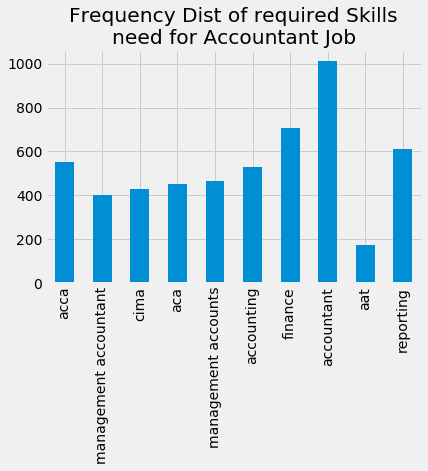

In [106]:
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

skill_values = []
for skill in top_skills:
    skill_values.append(sum(ac_desc_df[skill]))

skill_dist_final = pd.Series(data=skill_values, index=top_skills)
skill_dist_final.plot.bar()
plt.title('Frequency Dist of required Skills\nneed for Accountant Job')
plt.show()

## For Accountant: 
Here from the bar chart I see that from the top 10 skills keywords, **accountant, finance, reporting, acca, aca** are the top 5 skills need for this position.

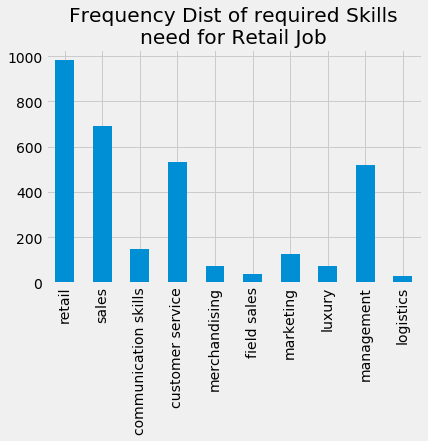

## For Retail: 
Here from the bar chart I see that from the top 10 skills keywords, **retail, sales, customer service, management, communication skills** are the top 5 skills need for this position.

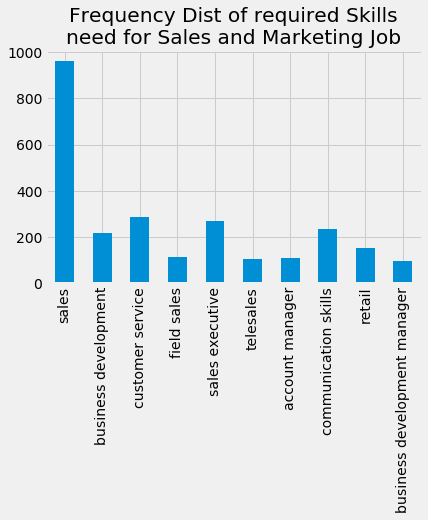

## For Sales and Marketing: 
Here from the bar chart I see that from the top 10 skills keywords, **sales, customer service, business development, communication skills, retail** are the top 5 skills need for this position.

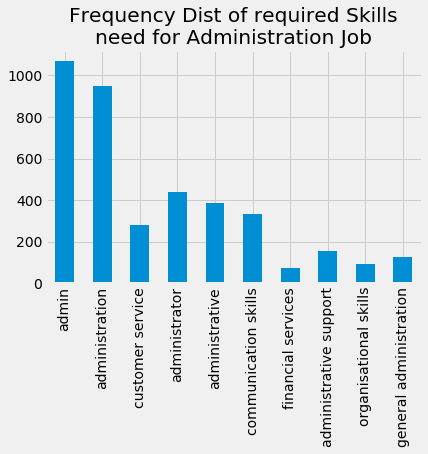

## For Administration: 
Here from the bar chart I see that from the top 10 skills keywords, **admin, administration, customer service, organizational skills, communication skills** are the top 5 skills need for this position.

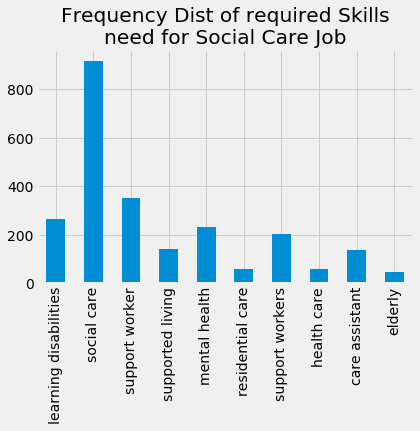

## For Social Care: 
Here from the bar chart I see that from the top 10 skills keywords, **social care, support worker, mental health, care assistant, learning disabilities** are the top 5 skills need for this position.